In [19]:
import numpy as np 
import pandas as pd 
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rxr
import pickle

In [16]:
# Read in the result of this:
aso_dem_fn = '../data/lidar/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif'

import rioxarray as rxr
aso_dem = rxr.open_rasterio(aso_dem_fn, masked=True).squeeze()

In [5]:
aso_dem

<xarray.DataArray (y: 5000, x: 5000)> Size: 100MB
[25000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40kB 2.272e+05 2.273e+05 ... 2.422e+05 2.422e+05
  * y            (y) float64 40kB 4.2e+06 4.2e+06 ... 4.185e+06 4.185e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

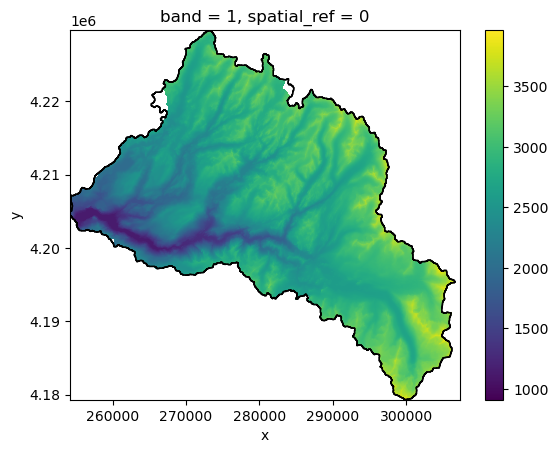

In [17]:
fig, ax = plt.subplots()
aso_dem.plot(ax=ax)
tuol_outline.to_crs('epsg:32611').plot(ax=ax, edgecolor='k', facecolor='none')

<Axes: >

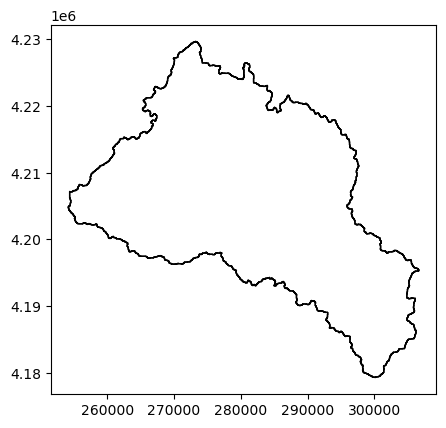

In [15]:
tuol_outline.to_crs('epsg:32611').plot(edgecolor='k', facecolor='none')

In [7]:
aso_dem.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]')

In [8]:
tuol_outline = gpd.read_file('../data/UpperTuolRiverBasinOutline.geojson')

In [21]:
# Load ATL06-SR data, from icesat2-sr:
atl06sr_gdf = pickle.load(open('../../icesat2_sr/tuolumne_basin/data/ATL06sr/tuolumne_all_sr-atl06-09282022_processed_bicubic_snowonaso.pkl', 'rb'))

/var/folders/s4/pymynk_14w75x2ghv0xjkqlm0000gn/T/ipykernel_70921/2614128071.py:2: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  atl06sr_gdf = pickle.load(open('../../icesat2_sr/tuolumne_basin/data/ATL06sr/tuolumne_all_sr-atl06-09282022_processed_bicubic_snowonaso.pkl', 'rb'))


In [22]:
atl06sr_gdf

,distance,h_sigma,rgt,delta_time,pflags,dh_fit_dy,segment_id,w_surface_window_final,dh_fit_dx,h_mean,...,site,acqdate,n,diff_plus,diff_plus_bicubic,zscore,ASO_snowon,ASO_snowon_date,ASO_snowon_bic,median_slope20d
time,,,,,,,,,,,,,,,,,,,,,
2018-10-15 23:22:20.018965444,4.215353e+06,0.033182,265,2.488094e+07,0,0.0,210188,3.000000,-0.018228,2501.377184,...,tuolumne,2018-10-15,919,-0.178201,-0.219547,-0.411177,NaN,NaN,NaN,NaN
2018-10-15 23:22:20.021811344,4.215373e+06,0.028329,265,2.488094e+07,0,0.0,210189,3.000000,-0.010939,2501.116873,...,tuolumne,2018-10-15,919,0.061488,-0.033683,-0.302681,NaN,NaN,NaN,NaN
2018-10-15 23:22:20.027481712,4.215413e+06,0.032855,265,2.488094e+07,0,0.0,210191,3.000000,-0.000515,2501.053838,...,tuolumne,2018-10-15,919,-0.011557,-0.072490,-0.325334,NaN,NaN,NaN,1.789189
2018-10-15 23:22:20.030305900,4.215434e+06,0.041974,265,2.488094e+07,0,0.0,210192,3.000000,0.008181,2501.176924,...,tuolumne,2018-10-15,919,0.171344,0.015610,-0.273906,NaN,NaN,NaN,1.543467
2018-10-15 23:22:20.033126928,4.215454e+06,0.045422,265,2.488094e+07,0,0.0,210193,3.000000,0.004802,2501.271832,...,tuolumne,2018-10-15,919,-0.173689,-0.122374,-0.354453,NaN,NaN,NaN,2.030019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06 07:52:14.166292256,4.221955e+06,0.103436,1149,1.397371e+08,0,0.0,210520,8.424878,-0.329516,3501.549246,...,tuolumne,2022-06-06,2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 07:52:14.174719728,4.222015e+06,0.101625,1149,1.397371e+08,0,0.0,210523,9.093066,-0.355783,3483.510153,...,tuolumne,2022-06-06,2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 07:52:14.177525200,4.222035e+06,0.093427,1149,1.397371e+08,0,0.0,210524,10.206696,-0.399543,3476.005923,...,tuolumne,2022-06-06,2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
atl06sr_gdf['acqdate'].unique()

array([datetime.date(2018, 10, 15), datetime.date(2018, 12, 11),
       datetime.date(2019, 1, 9), datetime.date(2019, 3, 12),
       datetime.date(2019, 4, 10), datetime.date(2019, 5, 14),
       datetime.date(2019, 6, 11), datetime.date(2019, 7, 9),
       datetime.date(2019, 7, 15), datetime.date(2019, 8, 13),
       datetime.date(2019, 9, 9), datetime.date(2019, 10, 8),
       datetime.date(2019, 10, 14), datetime.date(2019, 11, 12),
       datetime.date(2019, 12, 9), datetime.date(2019, 12, 11),
       datetime.date(2020, 1, 7), datetime.date(2020, 1, 13),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 11),
       datetime.date(2020, 3, 9), datetime.date(2020, 3, 10),
       datetime.date(2020, 4, 7), datetime.date(2020, 4, 12),
       datetime.date(2020, 6, 8), datetime.date(2020, 7, 7),
       datetime.date(2020, 7, 12), datetime.date(2020, 8, 5),
       datetime.date(2020, 8, 10), datetime.date(2020, 10, 6),
       datetime.date(2020, 10, 11), datetime.date(2020, 11, 

In [ ]:
atl06sr_gdf['acqdate'] = atl06sr_gdf.index.date

In [25]:
atl06sr_gdf.columns

Index(['distance', 'h_sigma', 'rgt', 'delta_time', 'pflags', 'dh_fit_dy',
       'segment_id', 'w_surface_window_final', 'dh_fit_dx', 'h_mean', 'spot',
       'gt', 'cycle', 'rms_misfit', 'n_fit_photons', 'geometry', 'doy',
       'decyear', 'dowy', 'snow_presence', 'lidar_z', 'difference',
       'bicubic_lidar_z', 'sampling_dif', 'difference_bicubic', 'site',
       'acqdate', 'n', 'diff_plus', 'diff_plus_bicubic', 'zscore',
       'ASO_snowon', 'ASO_snowon_date', 'ASO_snowon_bic', 'median_slope20d'],
      dtype='object')

In [28]:
atl06sr_gdf[atl06sr_gdf['snow_presence']==1]['acqdate'].unique()

array([datetime.date(2018, 12, 11), datetime.date(2019, 1, 9),
       datetime.date(2019, 3, 12), datetime.date(2019, 4, 10),
       datetime.date(2019, 5, 14), datetime.date(2019, 12, 9),
       datetime.date(2019, 12, 11), datetime.date(2020, 1, 7),
       datetime.date(2020, 1, 13), datetime.date(2020, 2, 5),
       datetime.date(2020, 2, 11), datetime.date(2020, 3, 9),
       datetime.date(2020, 3, 10), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 12), datetime.date(2020, 12, 6),
       datetime.date(2020, 12, 8), datetime.date(2021, 1, 10),
       datetime.date(2021, 2, 2), datetime.date(2021, 2, 8),
       datetime.date(2021, 3, 7), datetime.date(2021, 3, 13),
       datetime.date(2021, 4, 5), datetime.date(2021, 4, 11),
       datetime.date(2021, 5, 10), datetime.date(2022, 1, 3),
       datetime.date(2022, 1, 8), datetime.date(2022, 2, 6),
       datetime.date(2022, 4, 3)], dtype=object)

In [ ]:
# can i download these dates of the reanalysis product programatically using the script Ross made? check my github for that script.